In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'RBLX', 'SQ', 'AMAT', 'BABA', 'CYBR', 'NUAN', 'NVDA']

In [ ]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [3]:
#Assign weights to the stocks.
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071]) #20 percent each

In [ ]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [4]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [5]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-19'

In [6]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [7]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG,RBLX,SQ,AMAT,BABA,CYBR,NUAN,NVDA
Date,,,,,,,,,,,,
2012-05-18,38.230000,213.850006,16.316067,9.994286,299.078979,NaN,NaN,8.780375,NaN,NaN,17.887445,11.106503
2012-05-21,34.029999,218.110001,17.266645,10.248571,305.908386,NaN,NaN,9.034632,NaN,NaN,18.571428,11.299586
2012-05-22,31.000000,215.330002,17.134058,9.672857,299.278229,NaN,NaN,9.008987,NaN,NaN,18.528139,11.161671
2012-05-23,32.000000,217.279999,17.552126,10.272857,303.592072,NaN,NaN,9.120106,NaN,NaN,18.510822,11.437493
2012-05-24,33.029999,215.240005,17.390926,10.038571,300.702881,NaN,NaN,8.872231,NaN,NaN,18.034632,11.134089
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,311.540009,3379.389893,131.240005,552.780029,2254.790039,75.000000,265.200012,135.000000,244.009995,138.910004,52.849998,608.359985
2021-04-13,309.760010,3400.000000,134.429993,553.729980,2267.270020,82.050003,273.230011,135.100006,241.889999,143.250000,52.240002,627.179993
2021-04-14,302.820007,3333.000000,132.029999,540.020020,2254.840088,75.349998,258.399994,134.139999,239.229996,142.240005,52.790001,611.080017


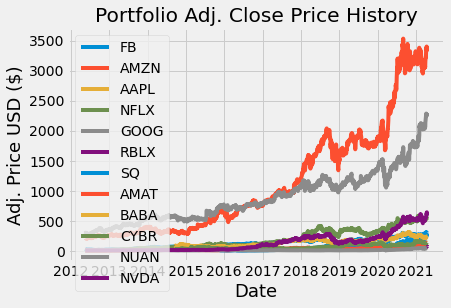

In [8]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [9]:
#Show the daily simply return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG,RBLX,SQ,AMAT,BABA,CYBR,NUAN,NVDA
Date,,,,,,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058260,0.025443,0.022835,NaN,NaN,0.028957,NaN,NaN,0.038238,0.017385
2012-05-22,-0.089039,-0.012746,-0.007679,-0.056175,-0.021674,NaN,NaN,-0.002838,NaN,NaN,-0.002331,-0.012205
2012-05-23,0.032258,0.009056,0.024400,0.062029,0.014414,NaN,NaN,0.012334,NaN,NaN,-0.000935,0.024712
2012-05-24,0.032187,-0.009389,-0.009184,-0.022806,-0.009517,NaN,NaN,-0.027179,NaN,NaN,-0.025725,-0.026527
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,-0.002944,0.002132,-0.013233,-0.004556,-0.013601,0.044132,0.013568,-0.028148,0.092696,0.023278,0.159500,0.056181
2021-04-13,-0.005714,0.006099,0.024307,0.001718,0.005535,0.094000,0.030279,0.000741,-0.008688,0.031243,-0.011542,0.030936
2021-04-14,-0.022404,-0.019706,-0.017853,-0.024759,-0.005482,-0.081658,-0.054277,-0.007106,-0.010997,-0.007051,0.010528,-0.025670


In [10]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG,RBLX,SQ,AMAT,BABA,CYBR,NUAN,NVDA
FB,0.138893,0.051602,0.043023,0.052105,0.047600,0.131313,0.074941,0.045091,0.046210,0.042793,0.033114,0.056695
AMZN,0.051602,0.091564,0.039762,0.063730,0.046415,0.103817,0.074699,0.043081,0.048013,0.043344,0.033097,0.053986
AAPL,0.043023,0.039762,0.082553,0.036511,0.038146,0.146174,0.077292,0.051688,0.043440,0.046513,0.031663,0.056715
NFLX,0.052105,0.063730,0.036511,0.227717,0.048611,0.120307,0.089341,0.048003,0.054625,0.045926,0.039623,0.063972
GOOG,0.047600,0.046415,0.038146,0.048611,0.065533,0.110647,0.066698,0.044995,0.043097,0.038299,0.032185,0.050663
RBLX,0.131313,0.103817,0.146174,0.120307,0.110647,0.722949,0.284922,0.159403,0.069913,0.202446,0.188378,0.247852
SQ,0.074941,0.074699,0.077292,0.089341,0.066698,0.284922,0.294404,0.109240,0.075643,0.091388,0.079858,0.130154
AMAT,0.045091,0.043081,0.051688,0.048003,0.044995,0.159403,0.109240,0.127518,0.058362,0.059609,0.043304,0.085832
BABA,0.046210,0.048013,0.043440,0.054625,0.043097,0.069913,0.075643,0.058362,0.115460,0.043741,0.038490,0.067930
CYBR,0.042793,0.043344,0.046513,0.045926,0.038299,0.202446,0.091388,0.059609,0.043741,0.249416,0.050949,0.067948


In [11]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.07699778756861031

In [12]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.27748475195695044

In [13]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.428831690501893

In [14]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 43.0%
Annual volatility / risk: 28.000000000000004%
Annual variance: 8.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [17]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.0), ('AMZN', 0.21788), ('AAPL', 0.0), ('NFLX', 0.28095), ('GOOG', 0.0), ('RBLX', 0.252), ('SQ', 0.12606), ('AMAT', 0.0), ('BABA', 0.0), ('CYBR', 0.0), ('NUAN', 0.0), ('NVDA', 0.1231)])
Expected annual return: 73.9%
Annual volatility: 40.9%
Sharpe Ratio: 1.76


(0.7390057281918705, 0.40861182725763784, 1.7596302412913838)

In [ ]:
#Highlight total  copy and paste and must add to 1 



In [20]:
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)


allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 1, 'NFLX': 5, 'RBLX': 29, 'SQ': 4, 'NVDA': 1}
Funds remaining: $7.31
